In [1]:
import yfinance as yf
import matplotlib.pyplot as plt

To earn $100 in dividends from T, you need to purchase 8979.89 shares. current price*shares 15.36=137931.03

To earn $100 in dividends from IRM, you need to purchase 3791.73 shares. current price*shares 62.64=237529.69

To earn $100 in dividends from F, you need to purchase 16152.41 shares. current price*shares 12.77=206185.58

To earn $100 in dividends from BHP, you need to purchase 2845.87 shares. current price*shares 57.51=163666.12



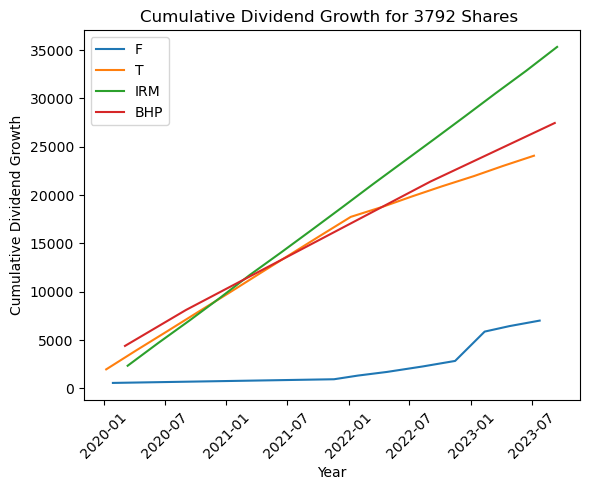

In [3]:
earnings=100
def getDividend_Per_Share(symbol,earnings):
    # Get the stock data from Yahoo Finance
    stock_data = yf.Ticker(symbol)
    # Get the current stock price and dividend yield
    current_price = stock_data.info['regularMarketDayHigh']
    dividend_yield = stock_data.info['dividendYield']
    # Calculate the dividend per share
    dividend_per_share = current_price * dividend_yield / 100
    # Calculate the number of shares required to earn $1000 in dividends
    shares_required = earnings / dividend_per_share
    return stock_data,current_price,dividend_yield,dividend_per_share,shares_required

t_symbol='T'
irm_symbol='IRM'
f_symbol='F'
bhp_symbol='BHP'
t_stock_data,t_current_price,t_dividend_yield,t_dividend_per_share,t_shares_required=getDividend_Per_Share(t_symbol,earnings)
irm_stock_data,irm_current_price,irm_dividend_yield,irm_dividend_per_share,irm_shares_required=getDividend_Per_Share(irm_symbol,earnings)
f_stock_data,f_current_price,f_dividend_yield,f_dividend_per_share,f_shares_required=getDividend_Per_Share(f_symbol,earnings)
bhp_stock_data,bhp_current_price,bhp_dividend_yield,bhp_dividend_per_share,bhp_shares_required=getDividend_Per_Share(bhp_symbol,earnings)
# Print the result
print(f"To earn ${earnings} in dividends from {t_symbol}, you need to purchase {t_shares_required:.2f} shares. current price*shares {t_current_price:.2f}={t_current_price*t_shares_required:.2f}\n")
print(f"To earn ${earnings} in dividends from {irm_symbol}, you need to purchase {irm_shares_required:.2f} shares. current price*shares {irm_current_price:.2f}={irm_current_price*irm_shares_required:.2f}\n")
print(f"To earn ${earnings} in dividends from {f_symbol}, you need to purchase {f_shares_required:.2f} shares. current price*shares {f_current_price:.2f}={f_current_price*f_shares_required:.2f}\n")
print(f"To earn ${earnings} in dividends from {bhp_symbol}, you need to purchase {bhp_shares_required:.2f} shares. current price*shares {bhp_current_price:.2f}={bhp_current_price*bhp_shares_required:.2f}\n")

shares=3792

def getCumulative(stock_data):
    dividend_data = stock_data.dividends
    dividend_data = dividend_data.loc['2020':'2024']
    cumulative_dividend = (dividend_data * shares).cumsum()
    #print(cumulative_dividend)
    return cumulative_dividend

f_cumulative_dividend=getCumulative(f_stock_data)
t_cumulative_dividend=getCumulative(t_stock_data)
irm_cumulative_dividend=getCumulative(irm_stock_data)
bhp_cumulative_dividend=getCumulative(bhp_stock_data)


# Plot the cumulative dividend growth
plt.plot(f_cumulative_dividend.index, f_cumulative_dividend,label="F")
plt.plot(t_cumulative_dividend.index, t_cumulative_dividend,label="T")
plt.plot(irm_cumulative_dividend.index, irm_cumulative_dividend,label="IRM")
plt.plot(bhp_cumulative_dividend.index, bhp_cumulative_dividend,label="BHP")
plt.title(f'Cumulative Dividend Growth for {shares} Shares ')
plt.xlabel('Year')
plt.ylabel('Cumulative Dividend Growth')
plt.xticks(rotation=45)
plt.legend()
plt.show()